In [ ]:
  import pandas as pd
  import matplotlib.pyplot as plt
  import numpy as np
  import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Daily_Sub-basin-wise_Rainfall_data_from_India_Meteorological_Department_Agency_during_June_2023.csv')
df

,Basin,Subbasin,Date,Year,Month,Avg_rainfall,Agency_name
0,Area of Inland drainage in Rajasthan Basin,Area of Inland drainage in Rajasthan,6/1/2023,2023,6,9.768964,IMD GRID MODEL
1,Area of Inland drainage in Rajasthan Basin,Area of Inland drainage in Rajasthan,6/2/2023,2023,6,1.447431,IMD GRID MODEL
2,Area of Inland drainage in Rajasthan Basin,Area of Inland drainage in Rajasthan,6/3/2023,2023,6,0.003095,IMD GRID MODEL
3,Area of Inland drainage in Rajasthan Basin,Area of Inland drainage in Rajasthan,6/4/2023,2023,6,6.811673,IMD GRID MODEL
4,Area of Inland drainage in Rajasthan Basin,Area of Inland drainage in Rajasthan,6/5/2023,2023,6,NaN,IMD GRID MODEL
...,...,...,...,...,...,...,...
1370,Godavari Basin,Weinganga,6/22/2023,2023,6,2.474157,IMD GRID MODEL
1371,Godavari Basin,Weinganga,6/23/2023,2023,6,13.161768,IMD GRID MODEL
1372,Godavari Basin,Weinganga,6/24/2023,2023,6,14.339334,IMD GRID MODEL
1373,Godavari Basin,Weinganga,6/25/2023,2023,6,2.229468,IMD GRID MODEL


In [ ]:
# Data Overview
total_observations = len(df)
total_observations


1375

Total observation is 1375


In [ ]:
unique_subbasins = df['Subbasin'].nunique()
unique_subbasins

46

46 unique subbasins are present in this dataset.

In [ ]:
unique_basins = df['Basin'].nunique()
unique_basins


9

9 unique basins are present in this dataset

In [ ]:
date_range = (df['Date'].min(), df['Date'].max())
date_range

('6/1/2023', '6/9/2023')

In [ ]:
dataset_structure = df.shape  # Number of rows and columns in the dataset
dataset_structure

(1375, 7)

1375 rows and 7 columns are present in this dataset.


In [ ]:
df.isnull().sum()


Basin             0
Subbasin          0
Date              0
Year              0
Month             0
Avg_rainfall    176
Agency_name       0
dtype: int64

'Avg_rainfall' column has 176 missing values.

In [ ]:
mean_value=df['Avg_rainfall'].mean()
df['Avg_rainfall'].fillna(mean_value,inplace=True)


In [ ]:
df.isnull().sum()

Basin           0
Subbasin        0
Date            0
Year            0
Month           0
Avg_rainfall    0
Agency_name     0
dtype: int64

Cheaking for null value

In [ ]:
df[df.duplicated()]

,Basin,Subbasin,Date,Year,Month,Avg_rainfall,Agency_name


There is no duplicate.

In [ ]:
#1 What is the total rainfall for each basin?
total_rainfall_per_basin = df.groupby('Basin')['Avg_rainfall'].sum()
total_rainfall_per_basin

Basin
Area of Inland drainage in Rajasthan Basin                    84.790738
Barak and Others Basin                                      1848.950396
Brahamaputra Basin                                           960.889924
Brahmani and Baitarni Basin                                  344.483991
Cauvery Basin                                                197.405145
East flowing rivers between Mahanadi and Pennar Basin        441.165984
East flowing rivers between Pennar and Kanyakumari Basin     269.433842
Ganga Basin                                                 2751.448924
Godavari Basin                                               812.729649
Name: Avg_rainfall, dtype: float64


The Basin with the highest average rainfall is "Ganga Basin" with an average rainfall of 2751.448924.

In [ ]:
#2 What is the total rainfall for each sub basin?
average_rainfall_per_subbasin = df.groupby('Subbasin')['Avg_rainfall'].mean()
average_rainfall_per_subbasin

Subbasin
Above Ramganga Confluence                               4.788662
Area of Inland drainage in Rajasthan                    2.826358
Baitarni                                                5.169161
Banas                                                   6.523973
Barak                                                  10.980747
Bhagirathi and others (Ganga Lower)                     7.045218
Brahmani                                                6.313639
Brahmaputra Lower                                      19.210666
Brahmaputra Upper                                      12.818998
Cauvery Lower                                           2.366231
Cauvery Middle                                          1.834668
Cauvery Upper                                           2.379272
Chambal Lower                                           6.115343
Chambal Upper                                           3.995560
Damodar                                                 5.173237
East flowing riv

The Sub Basin with the highest average rainfall is "Kynchiang and other south flowing rivers" with an average rainfall of 37.380726.

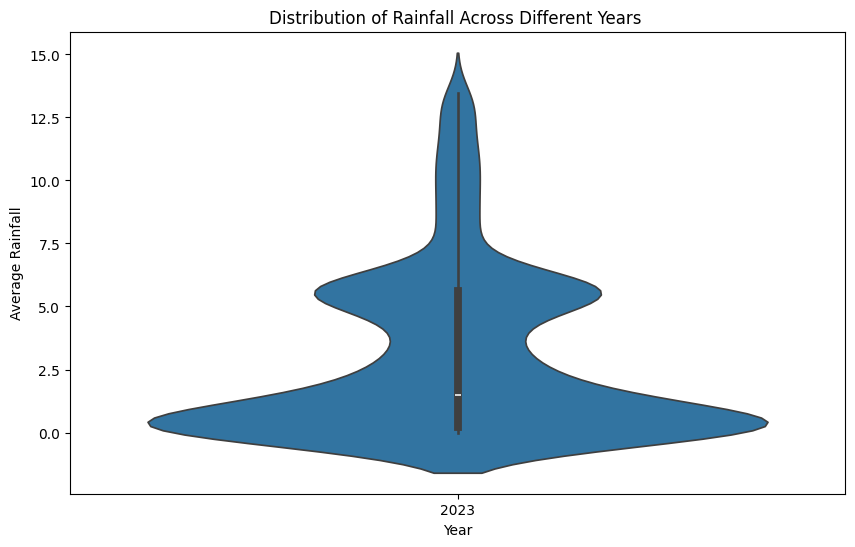

In [ ]:
#3 How does the distribution of average rainfall vary across different years in the dataset? (Visualized using a violin plot)
import seaborn as sns

#Identify outliers
Q1 = df['Avg_rainfall'].quantile(0.25)
Q3 = df['Avg_rainfall'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['Avg_rainfall'] >= lower_bound) & (df['Avg_rainfall'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_df, x='Year', y='Avg_rainfall')
plt.xlabel('Year')
plt.ylabel('Average Rainfall')
plt.title('Distribution of Rainfall Across Different Years ')
plt.show()

The highest Average rainfall in the year 2023 in between 0 and 2.5 . The lowest Average rainfall in the year 2023 in 15.

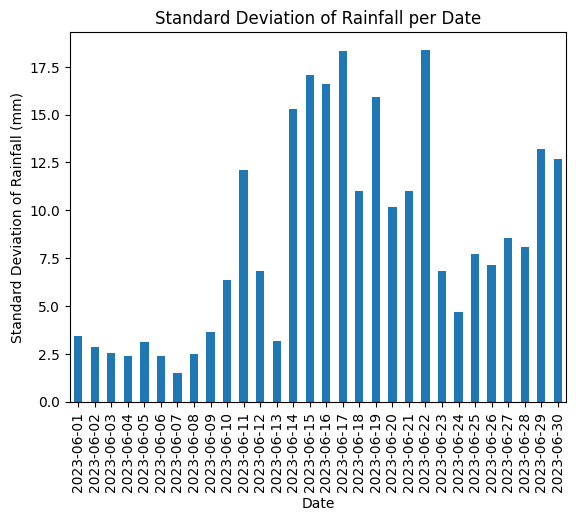

In [ ]:
#4 How does the daily rainfall vary for a specific basin as visualized in a filtered dataset?
df['Date'] = pd.to_datetime(df['Date'])

data_std_dev = df.groupby(df['Date'].dt.date)['Avg_rainfall'].std()

data_std_dev.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Standard Deviation of Rainfall (mm)')
plt.title('Standard Deviation of Rainfall per Date')
plt.show()


On 17 June,2023 and22,June 2023 standard deviaiton of rainfall is highest.

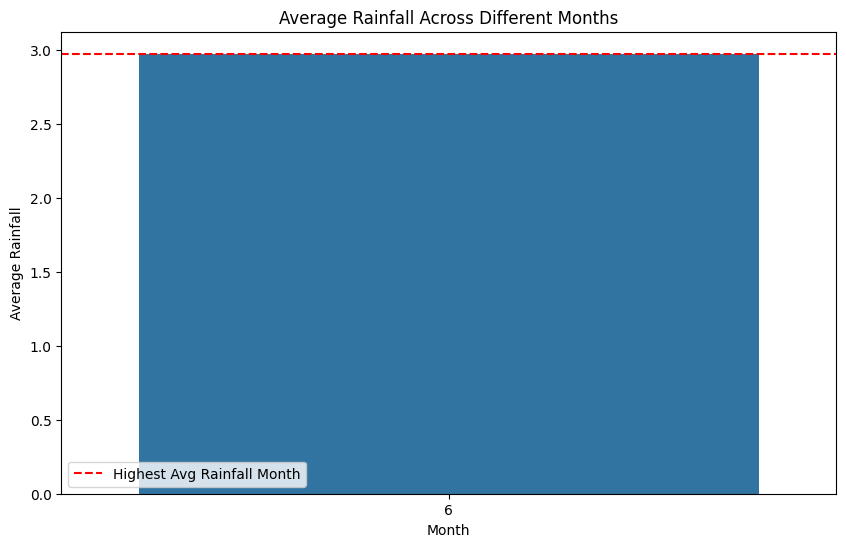

In [ ]:
#5 In which month is the average rainfall across all basins the highest?
df['Month'] = df['Date'].dt.month

Q1 = df['Avg_rainfall'].quantile(0.25)
Q3 = df['Avg_rainfall'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['Avg_rainfall'] >= lower_bound) & (df['Avg_rainfall'] <= upper_bound)]

highest_avg_rainfall_month = filtered_df.groupby('Month')['Avg_rainfall'].mean().idxmax()

plt.figure(figsize=(10, 6))

sns.barplot(data=filtered_df, x='Month', y='Avg_rainfall', errorbar=None)

plt.axhline(filtered_df.groupby('Month')['Avg_rainfall'].mean().loc[highest_avg_rainfall_month], color='red', linestyle='--', label='Highest Avg Rainfall Month')

plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.title('Average Rainfall Across Different Months')
plt.legend()
plt.show()



In 6th month, the average rainfall across all basins the highest.

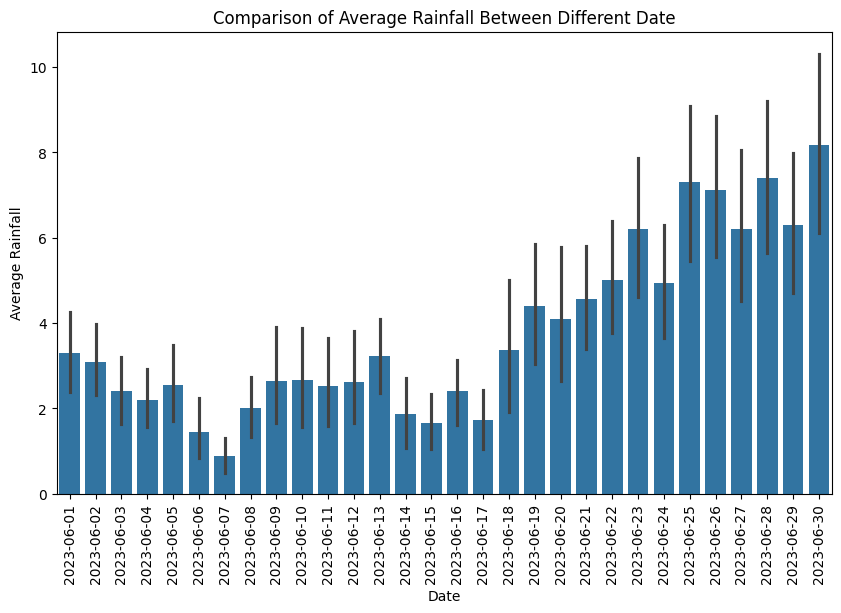

In [ ]:
#6 How does the average rainfall differ across different Date, considering all basins combined? (Visualized using a grouped bar chart)
filtered_df = df[df['Avg_rainfall'] < df['Avg_rainfall'].quantile(0.95)]

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x='Date', y='Avg_rainfall')
plt.xlabel('Date')
plt.ylabel('Average Rainfall')
plt.title('Comparison of Average Rainfall Between Different Date')
plt.xticks(rotation=90)

plt.show()

The plot compares the average rainfall for different dates. Dates are plotted along the x-axis, and average rainfall (in millimeters) is shown on the y-axis.

In [ ]:
#7 How is the rainfall distributed across different dates?
rainfall_distribution_per_date = df.groupby('Date')['Avg_rainfall'].describe()
rainfall_distribution_per_date

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
2023-06-01,45.0,3.306685,3.410282,0.000597,0.506504,2.302629,5.608217,16.107263
2023-06-02,46.0,3.078995,2.840397,0.004336,0.356435,2.702395,5.608217,13.182016
2023-06-03,46.0,2.404528,2.556361,0.000967,0.112869,0.967662,5.608217,5.608217
2023-06-04,46.0,2.200051,2.364300,0.000717,0.174760,1.063431,5.299665,6.811673
2023-06-05,46.0,2.537968,3.094412,0.000564,0.220877,1.208171,3.972650,16.010485
2023-06-06,46.0,1.452331,2.401512,0.000514,0.160068,0.508374,1.670272,13.044374
2023-06-07,46.0,0.880038,1.469951,0.000069,0.066397,0.303381,0.727918,5.608217
2023-06-08,46.0,2.005374,2.493255,0.000159,0.071390,0.565911,5.125142,8.775982
2023-06-09,46.0,2.635804,3.624038,0.000089,0.234216,0.787098,5.608217,17.818262


The variable rainfall_distribution_per_date contains descriptive statistics of the rainfall distribution across different dates in the dataset. It provides information such as the count, mean, standard deviation, minimum, maximum, and quartiles of the average rainfall values for each date. This summary offers an overview of how rainfall is distributed over time, including measures of central tendency and variability.

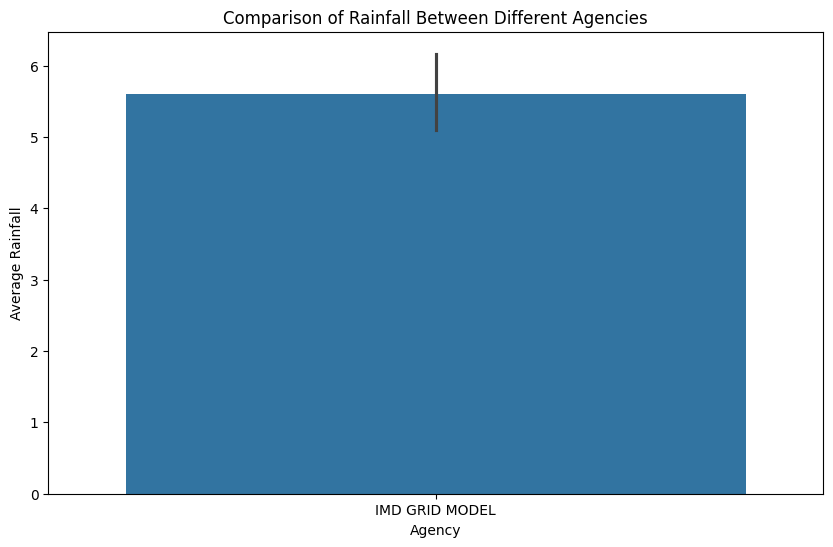

In [ ]:
#8 Is there a statistically significant difference in the average rainfall reported by different agencies in the dataset? (Visualized using a grouped bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Agency_name', y='Avg_rainfall')
plt.xlabel('Agency')
plt.ylabel('Average Rainfall')
plt.title('Comparison of Rainfall Between Different Agencies')
plt.show()


There is no statistically significant difference in the average rainfall reported by different agencies in the dataset.

In [ ]:
#9 Is there any correlation between average rainfall and the year of measurement?
correlation = df['Year'].corr(df['Avg_rainfall'])
correlation

nan

The variable "correlation" quantifies the strength and direction of the linear relationship between average rainfall and the year of measurement. A positive correlation suggests that as the year increases, so does the average rainfall, while a negative correlation implies the opposite. Values closer to 1 or -1 indicate a stronger correlation, while values closer to 0 suggest a weaker or no correlation.


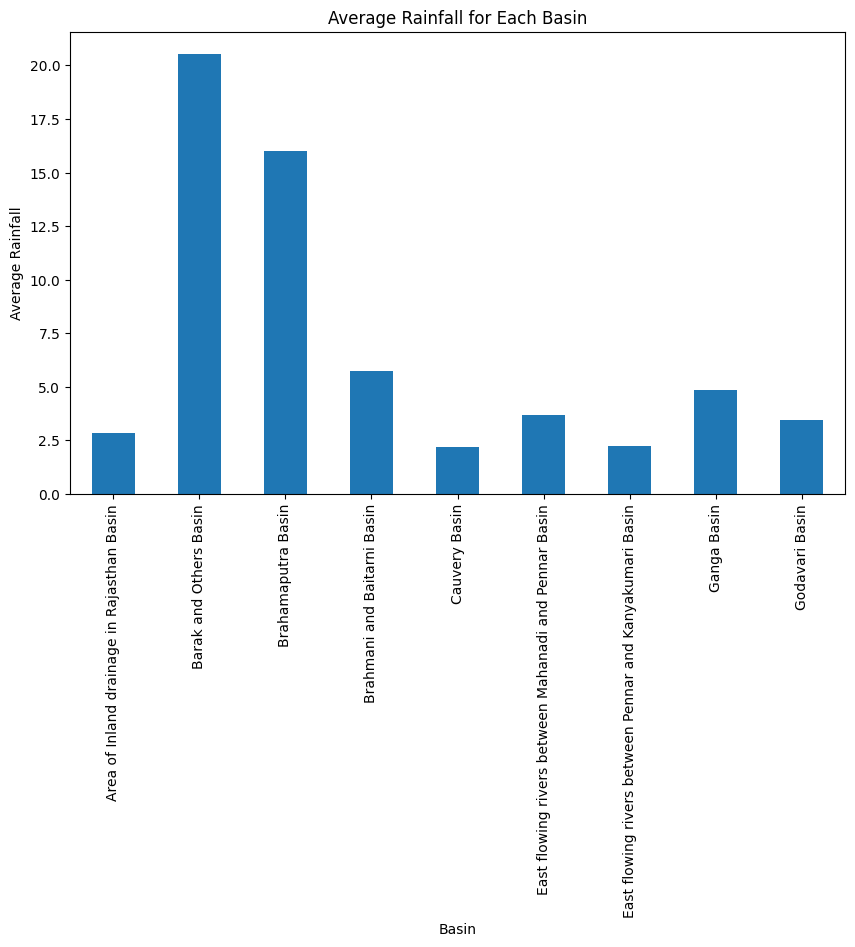

In [ ]:
#10 What is the average rainfall for each basin? (Visualized with a bar chart)
plt.figure(figsize=(10, 6))
df.groupby('Basin')['Avg_rainfall'].mean().plot(kind='bar')
plt.xlabel('Basin')
plt.ylabel('Average Rainfall')
plt.title('Average Rainfall for Each Basin')
plt.show()

Barak and other basin has highest average rainfall in the dataset.

In [ ]:
#11 Are there any data points that deviate significantly from the overall trend? (Identify outliers)
outliers = df[df['Avg_rainfall'] > df['Avg_rainfall'].quantile(0.95)]
outliers

,Basin,Subbasin,Date,Year,Month,Avg_rainfall,Agency_name
44,Barak and Others Basin,Barak,2023-06-15,2023,6,33.220661,IMD GRID MODEL
45,Barak and Others Basin,Barak,2023-06-16,2023,6,30.443874,IMD GRID MODEL
46,Barak and Others Basin,Barak,2023-06-17,2023,6,28.873994,IMD GRID MODEL
69,Barak and Others Basin,Kynchiang and other south flowing rivers,2023-06-10,2023,6,35.554868,IMD GRID MODEL
70,Barak and Others Basin,Kynchiang and other south flowing rivers,2023-06-11,2023,6,67.201247,IMD GRID MODEL
...,...,...,...,...,...,...,...
1078,Ganga Basin,Yamuna Lower,2023-06-29,2023,6,28.943911,IMD GRID MODEL
1133,Ganga Basin,Yamuna Upper,2023-06-25,2023,6,29.281996,IMD GRID MODEL
1165,Godavari Basin,Godavari Lower,2023-06-26,2023,6,24.878353,IMD GRID MODEL
1251,Godavari Basin,Indravati,2023-06-23,2023,6,29.114537,IMD GRID MODEL


The variable "outliers" captures data points significantly deviating from the dataset's overall trend. These are rows where average rainfall values exceed the 95th percentile, signifying unusually high rainfall compared to the majority. Identifying outliers is essential for detecting extreme events or anomalies in rainfall data.

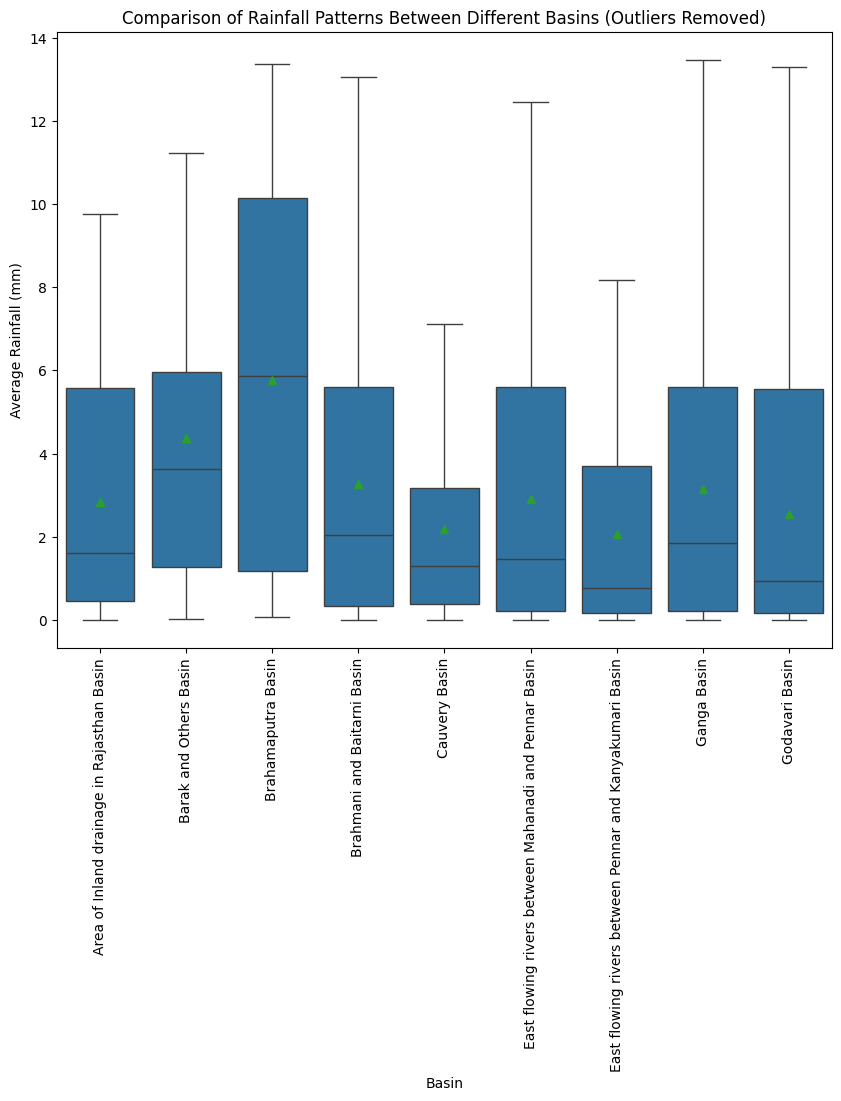

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Q1 = df['Avg_rainfall'].quantile(0.25)
Q3 = df['Avg_rainfall'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['Avg_rainfall'] >= lower_bound) & (df['Avg_rainfall'] <= upper_bound)]

plt.figure(figsize=(10, 8))
sns.boxplot(x='Basin', y='Avg_rainfall', showmeans=True, showfliers=False, data=filtered_df)  # Set showfliers=Fals e
plt.xlabel('Basin')
plt.ylabel('Average Rainfall (mm)')
plt.title('Comparison of Rainfall Patterns Between Different Basins (Outliers Removed)')
plt.xticks(rotation=90)
plt.show()


The plot depicts the distribution of average rainfall across various basins, with outliers removed. Each box plot represents a basin, showing the spread and central tendency of rainfall values.

In [ ]:
#13 What percentage of the total rainfall does each sub-basin contribute?
percentage_contribution = df.groupby('Subbasin')['Avg_rainfall'].sum() / df['Avg_rainfall'].sum() * 100
percentage_contribution

Subbasin
Above Ramganga Confluence                               1.862979
Area of Inland drainage in Rajasthan                    1.099565
Baitarni                                                2.011008
Banas                                                   2.538083
Barak                                                   4.271945
Bhagirathi and others (Ganga Lower)                     2.740868
Brahmani                                                2.456255
Brahmaputra Lower                                       7.473709
Brahmaputra Upper                                       4.987097
Cauvery Lower                                           0.920558
Cauvery Middle                                          0.713758
Cauvery Upper                                           0.925631
Chambal Lower                                           2.379110
Chambal Upper                                           1.554431
Damodar                                                 2.012594
East flowing riv


Kynchiang and other south flowing rivers has highest percentage contribution
of 14.542580

In [ ]:
#14 Is there evidence of seasonality in the rainfall data?
seasonality = df.groupby('Date')['Avg_rainfall'].mean()
seasonality

Date
2023-06-01     3.306685
2023-06-02     3.078995
2023-06-03     2.404528
2023-06-04     2.200051
2023-06-05     2.537968
2023-06-06     1.452331
2023-06-07     0.880038
2023-06-08     2.005374
2023-06-09     2.635804
2023-06-10     3.389397
2023-06-11     5.753344
2023-06-12     4.113289
2023-06-13     3.235825
2023-06-14     5.046190
2023-06-15     6.752786
2023-06-16     7.507290
2023-06-17     7.052274
2023-06-18     5.397243
2023-06-19     9.680467
2023-06-20     6.911640
2023-06-21     7.497858
2023-06-22     8.981863
2023-06-23     7.113999
2023-06-24     4.933869
2023-06-25     8.319191
2023-06-26     8.336256
2023-06-27     7.803454
2023-06-28     8.841836
2023-06-29     9.742012
2023-06-30    11.623269
Name: Avg_rainfall, dtype: float64

Variable 'seasonality' aggregates average daily rainfall, aiding in detecting seasonal patterns in the data. June 30,2023 has the highest average rainfall in the dataset.

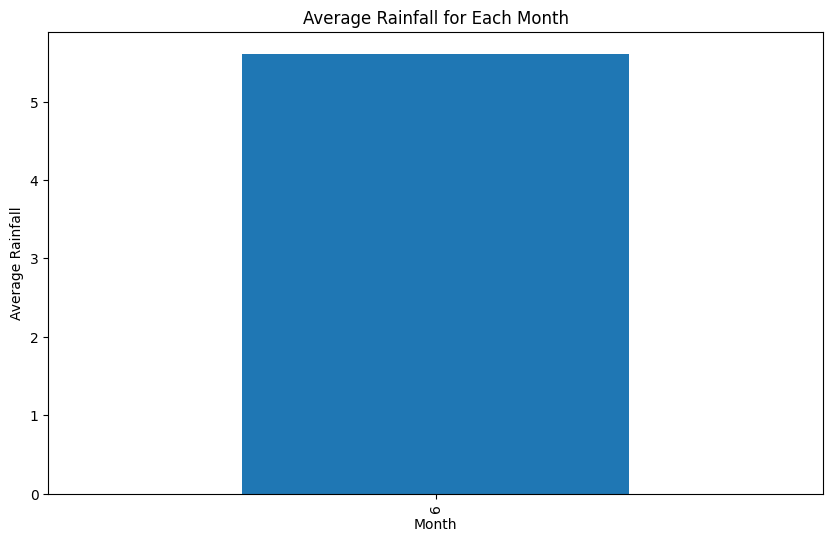

In [ ]:
#15 How does the average rainfall vary across different months?
plt.figure(figsize=(10, 6))
df.groupby('Month')['Avg_rainfall'].mean().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.title('Average Rainfall for Each Month')
plt.show()

The bar indicates the average rainfall recorded for a specific month.Month 6 have the highest average rainfall in this dataset.

In [ ]:
#16 Is there a discernible variance in average rainfall between weekdays and weekends within the dataset?
df['Day'] = df['Date'].dt.day_name()
rainfall_weekdays_vs_weekends = df.groupby('Day')['Avg_rainfall'].mean()
rainfall_weekdays_vs_weekends

Day
Friday       6.369027
Monday       6.166995
Saturday     4.445017
Sunday       5.417457
Thursday     6.154528
Tuesday      4.834678
Wednesday    5.548582
Name: Avg_rainfall, dtype: float64

Yes, Fridays and Mondays typically have the highest rainfall, while Saturdays experience the lowest.

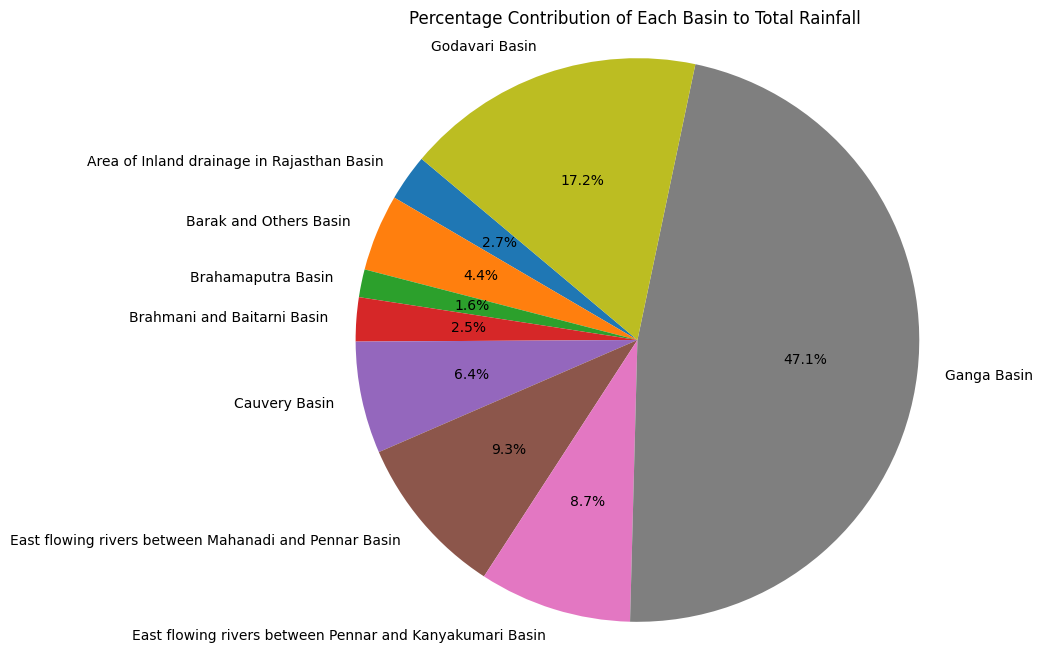

In [ ]:
#17 How is the distribution of total rainfall contribution among different basins represented in a pie chart?

filtered_df = df[(df['Avg_rainfall'] >= lower_bound) & (df['Avg_rainfall'] <= upper_bound)]

plt.figure(figsize=(8, 8))
plt.pie(filtered_df.groupby('Basin')['Avg_rainfall'].sum(), labels=filtered_df['Basin'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Percentage Contribution of Each Basin to Total Rainfall ')
plt.axis('equal')
plt.show()


Ganga basin is the highest distribution of total rainfall contribution among different basins and the area of inland drainage in rajasthan basin is the lowest among all the basin

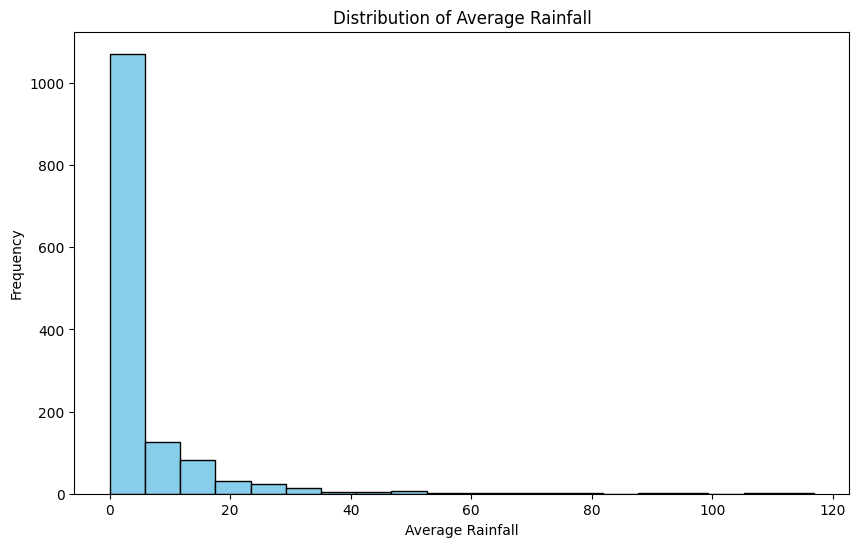

In [ ]:
#18 How is the distribution of average rainfall depicted through a histogram?
plt.figure(figsize=(10, 6))
plt.hist(df['Avg_rainfall'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Average Rainfall')
plt.ylabel('Frequency')
plt.title('Distribution of Average Rainfall')
plt.show()

Here the average value near 0 and 1 has the highest frequency among all .

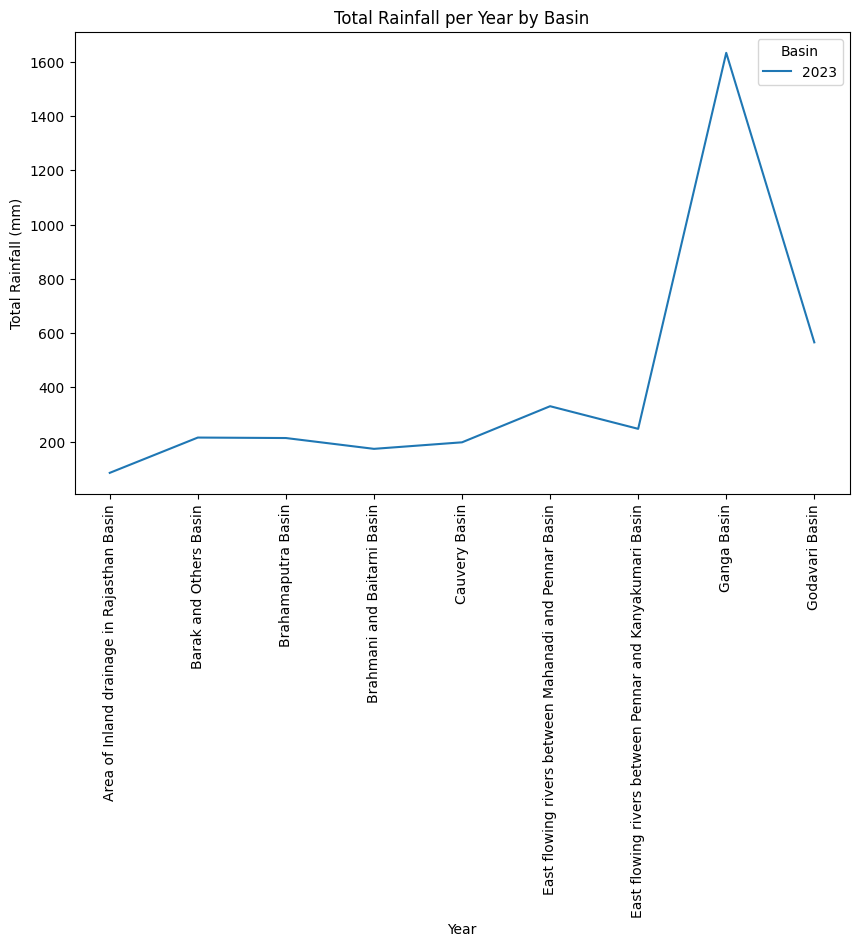

In [ ]:
#19 What is the total rainfall for each basin grouped by year?
Q1 = df['Avg_rainfall'].quantile(0.25)
Q3 = df['Avg_rainfall'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['Avg_rainfall'] >= lower_bound) & (df['Avg_rainfall'] <= upper_bound)]

total_rain_by_basin_year = filtered_df.groupby(['Basin', 'Year'])['Avg_rainfall'].sum().unstack()

ax = total_rain_by_basin_year.plot(kind='line', figsize=(10, 6))
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.title('Total Rainfall per Year by Basin')
plt.legend(title='Basin')
plt.show()

Each line on the plot represents a different basin, showing the variation in total rainfall over the years.The highest rainfall of 1600mm in the year 2023.

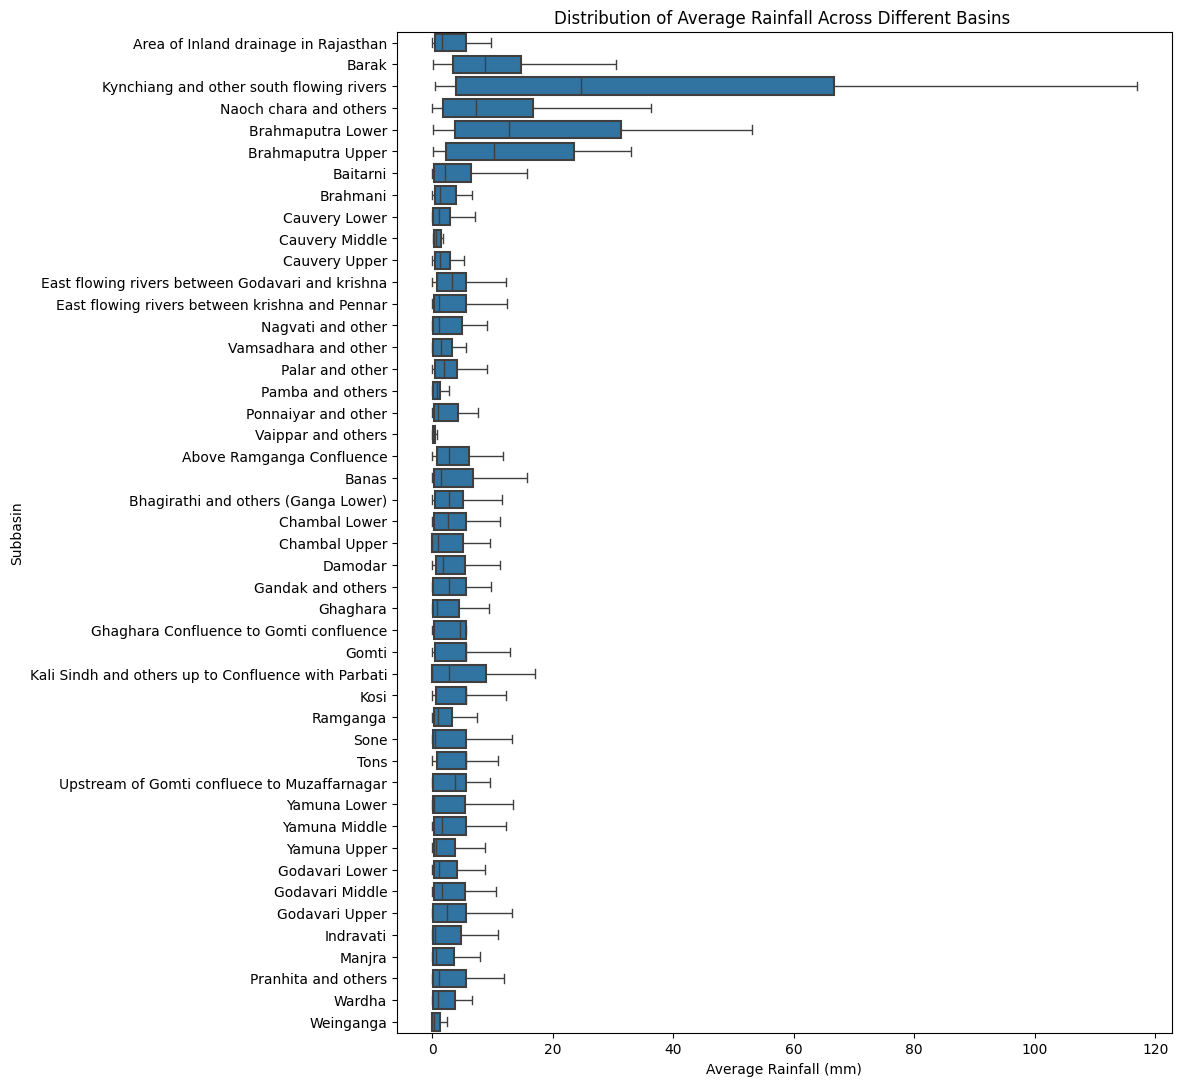

In [ ]:
#20 How does the correlation between two features manifest in a box plot?



plt.figure(figsize=(10, 13))
sns.boxplot(y='Subbasin', x='Avg_rainfall', data=cleaned_df, showfliers=False, boxprops=dict(linewidth=1.5))
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Subbasin')
plt.title('Distribution of Average Rainfall Across Different Basins ')
plt.show()


The code generates a box plot showing the distribution of average rainfall across different subbasins. This visualization helps compare rainfall patterns between subbasins

In [ ]:
df.to_excel('output.xlsx', index=False)
df

,Basin,Subbasin,Date,Year,Month,Avg_rainfall,Agency_name,Day
0,Area of Inland drainage in Rajasthan Basin,Area of Inland drainage in Rajasthan,2023-06-01,2023,6,9.768964,IMD GRID MODEL,Thursday
1,Area of Inland drainage in Rajasthan Basin,Area of Inland drainage in Rajasthan,2023-06-02,2023,6,1.447431,IMD GRID MODEL,Friday
2,Area of Inland drainage in Rajasthan Basin,Area of Inland drainage in Rajasthan,2023-06-03,2023,6,0.003095,IMD GRID MODEL,Saturday
3,Area of Inland drainage in Rajasthan Basin,Area of Inland drainage in Rajasthan,2023-06-04,2023,6,6.811673,IMD GRID MODEL,Sunday
4,Area of Inland drainage in Rajasthan Basin,Area of Inland drainage in Rajasthan,2023-06-05,2023,6,5.608217,IMD GRID MODEL,Monday
...,...,...,...,...,...,...,...,...
1370,Godavari Basin,Weinganga,2023-06-22,2023,6,2.474157,IMD GRID MODEL,Thursday
1371,Godavari Basin,Weinganga,2023-06-23,2023,6,13.161768,IMD GRID MODEL,Friday
1372,Godavari Basin,Weinganga,2023-06-24,2023,6,14.339334,IMD GRID MODEL,Saturday
1373,Godavari Basin,Weinganga,2023-06-25,2023,6,2.229468,IMD GRID MODEL,Sunday
